In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Calculation for the efficiency

In [13]:
volt = [1150,1257,1386,1480,1544,1580,1637]
f3_count = [2034,2138,2064,2048,2057,2061,2118]
det_count = [1,32,1033,2017,2037,2043,2098]

In [14]:
efficiency =  np.array(det_count)/np.array(f3_count) * 100

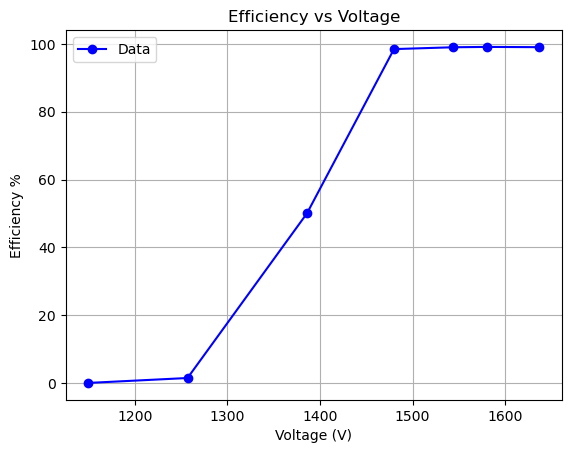

In [15]:
plt.plot(volt, efficiency, 'bo-', label='Data')
plt.xlabel('Voltage (V)')
plt.ylabel('Efficiency %')
plt.title('Efficiency vs Voltage')
plt.grid()
plt.legend()
plt.show()

### Landau fit to the data

In [16]:
def analyze_experimental_data(filename):

    ## Opening the data file and extracting the necessary data to the lists
    with open(filename, "r") as file:
        lines = file.readlines()

    # Extract every 3rd line (index 2, 5, 8, ...)
    third_lines = lines[2::3]

    # Initialize empty lists for each column
    data1, data2, data3 = [], [], []

    # Extract values into separate lists
    for line in third_lines:
        parts = line.strip().split()
        if len(parts) >= 3:  # Ensure at least 3 elements
            data1.append(int(parts[0]))
            data2.append(int(parts[1]))
            data3.append(int(parts[2]))

    # Convert to numpy arrays
    data1 = np.array(data1)
    data2 = np.array(data2)
    data3 = np.array(data3)

    # ------------------------------
    # 1. Define Landau PDF
    # ------------------------------
    def landau_pdf(x, mpv=0.0, eta=1.0):
        xi = (x - mpv) / eta
        return np.exp(-0.5 * (xi + np.exp(-xi))) / eta

    def landau_fit_func(x, mpv, eta, A):
        return A * landau_pdf(x, mpv, eta)

    # ------------------------------
    # 2. Histogram of data
    # ------------------------------
    count, bin_edges = np.histogram(data2, bins=512)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # ------------------------------
    # 3. Landau Fit to all data
    # ------------------------------
    p0_landau = [np.median(data2), 5.0, np.max(count)]
    params_landau, _ = curve_fit(landau_fit_func, bin_centers, count, p0=p0_landau)

    # ------------------------------
    # 4. Chi-square calculation
    # ------------------------------
    y_obs = count
    y_exp = landau_fit_func(bin_centers, *params_landau)

    sigma = np.sqrt(y_obs)
    sigma[sigma == 0] = 1.0

    chi2 = np.sum(((y_obs - y_exp)**2) / sigma**2)
    ndof = len(y_obs) - len(params_landau)

    # ------------------------------
    # 5. Prepare output
    # ------------------------------
    x_fit = np.linspace(bin_centers[0], bin_centers[-1], 1000)
    y_landau_fit = landau_fit_func(x_fit, *params_landau)

    data_val = np.array([bin_centers * 0.25, count])
    fit_val_landau = np.array([x_fit * 0.25, y_landau_fit])
    fit_val_gaussian = np.array([[], []])  # Empty since Gaussian removed
    landau_param = [0.25 * params_landau[0], 0.25 * params_landau[1], np.max(y_landau_fit)]
    chi_square_param = [chi2, ndof, chi2 / ndof]

    return data_val, fit_val_landau, fit_val_gaussian, landau_param, chi_square_param


In [17]:
def generate_data_plot(filename, voltage):
    data_val, fit_val_landau, fit_val_gaussian, landau_param, chi_square_param = analyze_experimental_data(f"{filename}")
    plt.plot(data_val[0], data_val[1], color='black', label="Data")
    plt.plot(fit_val_landau[0], fit_val_landau[1], 'r-', label="Landau Fit")
    plt.xlabel("Charge (fC)")
    plt.ylabel("Count")
    plt.xlim(0, 250)
    plt.title(f"Muon detector charge spectrum for detector voltage {voltage} V")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    print("----- Landau Fit Parameters -----")
    print(f"MPV (Most Probable Value): {landau_param[0]:.2f}")
    print(f"Width (eta):               {landau_param[1]:.2f}")
    print(f"Amplitude:                 {landau_param[2]:.2f}")
    print("\n----- Chi-square Statistics -----")
    print(f"Chi-square:     {chi_square_param[0]:.2f}")
    print(f"Degrees of DOF: {chi_square_param[1]}")
    print(f"Reduced χ²:     {chi_square_param[2]:.2f}")
    return landau_param

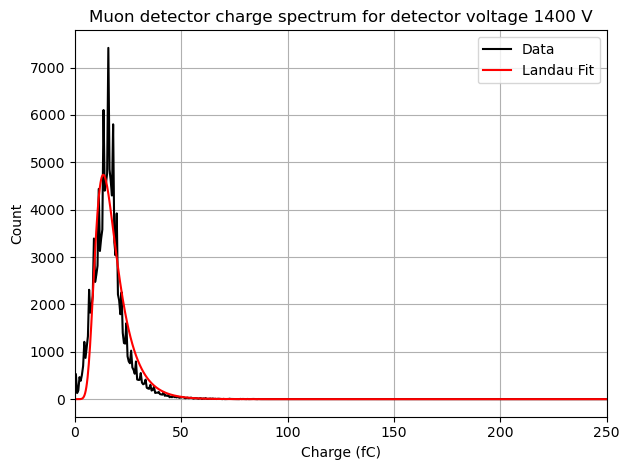

----- Landau Fit Parameters -----
MPV (Most Probable Value): 13.39
Width (eta):               3.61
Amplitude:                 4736.17

----- Chi-square Statistics -----
Chi-square:     20272.39
Degrees of DOF: 509
Reduced χ²:     39.83


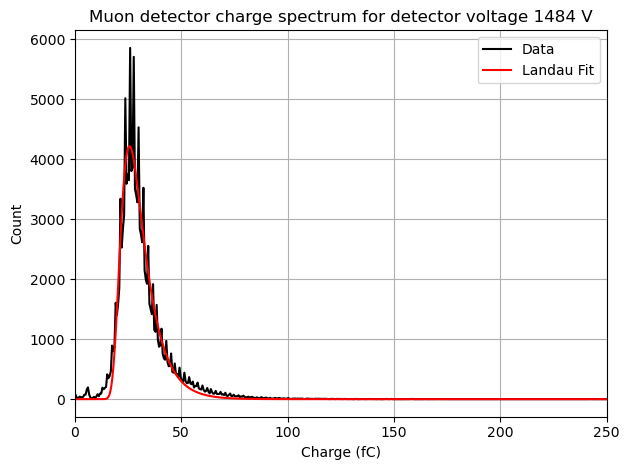

----- Landau Fit Parameters -----
MPV (Most Probable Value): 25.72
Width (eta):               3.87
Amplitude:                 4216.68

----- Chi-square Statistics -----
Chi-square:     10995.46
Degrees of DOF: 509
Reduced χ²:     21.60


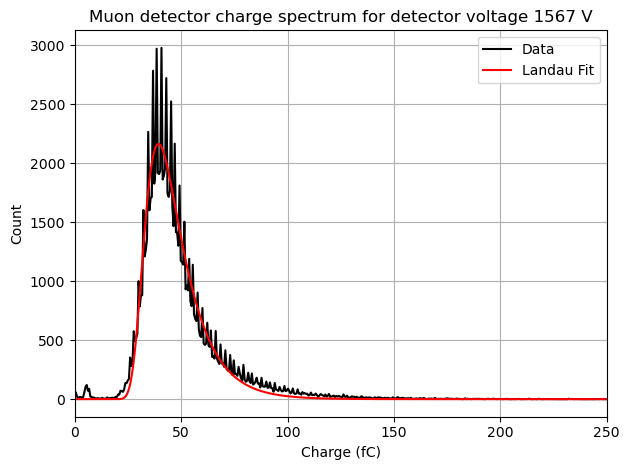

----- Landau Fit Parameters -----
MPV (Most Probable Value): 39.33
Width (eta):               6.11
Amplitude:                 2164.35

----- Chi-square Statistics -----
Chi-square:     8331.96
Degrees of DOF: 509
Reduced χ²:     16.37


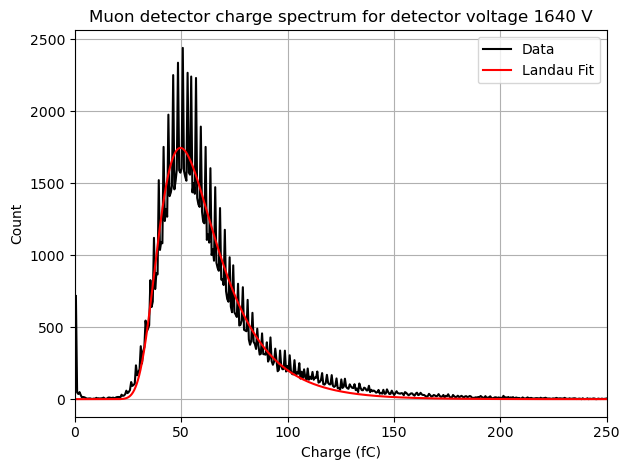

----- Landau Fit Parameters -----
MPV (Most Probable Value): 49.67
Width (eta):               9.47
Amplitude:                 1746.20

----- Chi-square Statistics -----
Chi-square:     9279.22
Degrees of DOF: 509
Reduced χ²:     18.23


In [18]:
d02 = generate_data_plot("eve02042025.txt", 1400)
d28 = generate_data_plot("eve28032025.txt", 1484)
d27 = generate_data_plot("eve27032025.txt", 1567)
d03 = generate_data_plot("eve03042025.txt", 1640)

### Dark current estimation

Mean (mu): 5.66
So the dark current is causing the peak 5.66 fC


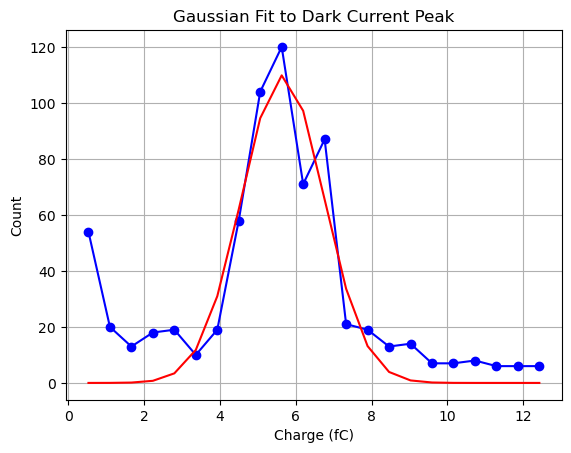

In [19]:
with open("eve27032025.txt", "r") as file:
    lines = file.readlines()

# Extract every 3rd line (index 2, 5, 8, ...)
third_lines = lines[2::3]

# Initialize empty lists for each column
data1, data2, data3 = [], [], []

# Extract values into separate lists
for line in third_lines:
    parts = line.strip().split()
    if len(parts) >= 3:  # Ensure at least 3 elements
        data1.append(int(parts[0]))
        data2.append(int(parts[1]))
        data3.append(int(parts[2]))

# Convert to numpy arrays
data1 = np.array(data1)
data2 = np.array(data2)
data3 = np.array(data3)

def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

# 5. Gaussian Fit to [0, 50]
# ------------------------------
count, bin_edges = np.histogram(data2, bins=512)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
mask = (bin_centers >= 0) & (bin_centers <= 50)
x_gauss = bin_centers[mask]
y_gauss = count[mask]

p0_gauss = [np.mean(x_gauss), np.std(x_gauss), np.max(y_gauss)]
params_gauss, _ = curve_fit(gaussian, x_gauss, y_gauss, p0=p0_gauss)


print(f"Mean (mu): {params_gauss[0]*0.25:.2f}")
print(f"So the dark current is causing the peak {params_gauss[0]*0.25:.2f} fC")

plt.figure()
plt.plot(x_gauss*0.25, y_gauss, 'bo-', label='Data')
plt.plot(x_gauss*0.25, gaussian(x_gauss, *params_gauss), 'r-', label='Gaussian Fit')
plt.xlabel("Charge (fC)")
plt.ylabel("Count")
plt.title("Gaussian Fit to Dark Current Peak")
plt.grid()
plt.show()

### Some relations plot

In [20]:
d = [d02, d28, d27, d03]
v = [1400, 1484, 1567, 1640]
d = np.array(d)
v = np.array(v)

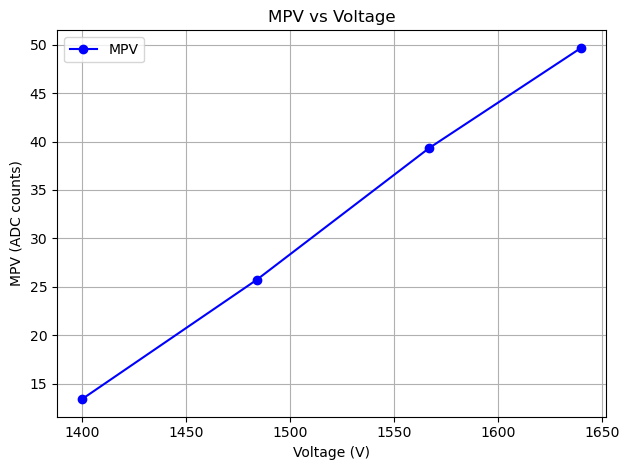

In [21]:
plt.plot(v, d[:, 0], 'bo-', label="MPV")
plt.xlabel("Voltage (V)")
plt.ylabel("MPV (ADC counts)")
plt.title("MPV vs Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

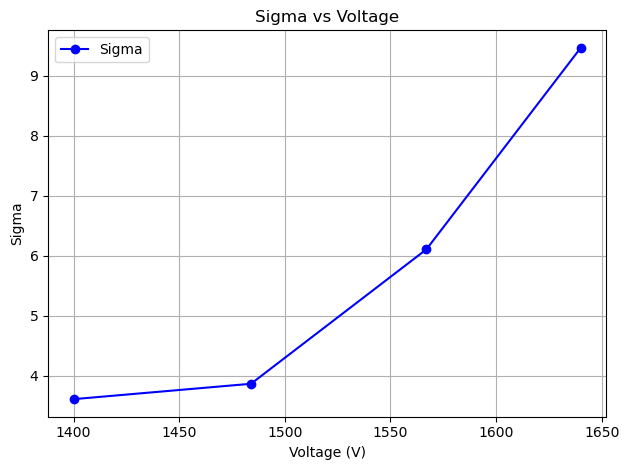

In [22]:
plt.plot(v, d[:, 1], 'bo-', label="Sigma")
plt.xlabel("Voltage (V)")
plt.ylabel("Sigma")
plt.title("Sigma vs Voltage")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Chance coincidance ratw

In [23]:
n1 = 30005
n2 = 30614
n3 = 14032
t = 50*10**-9
N = 3

In [24]:
cq = N*(n1*n2*n3)*t**(N-1)

In [25]:
print(f"The chance coincidance rate is: {cq:.2e} Hz")
print(f"So the chance of coincidance of a particle is in time: {1/cq:0.2f} s")

The chance coincidance rate is: 9.67e-02 Hz
So the chance of coincidance of a particle is in time: 10.34 s
